## Пример расчета с прописанными здесь функциями, переменные функциях не передаются, из-за этого возникла ошибка из за переопределения глобальных переменных, воспользуйтесь другим JNotebook. Этот удалять просто жалко

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import scipy as sp
import sys
import pylab
from scipy.optimize import fsolve


from bokeh.layouts import column,row,layout
from bokeh.models import ColumnDataSource, Slider, RadioButtonGroup,TableColumn, DataTable, Range1d, LinearAxis
from bokeh.plotting import figure, output_file, show
from bokeh.themes import Theme
from bokeh.io import show, output_notebook, output_file, push_notebook
from bokeh.layouts import widgetbox
from bokeh.models.tools import HoverTool, PointDrawTool

sys.path.append('../')
import uPVT.PVT as PVT
import uSep.separation as sp
import uTemperature.uTemp as temp

output_notebook()

Result of separation check:
qgas_scm3day -work right
qo_scm3day -work right
unf_calc_natural_separation -work right
unf_calc_total_separation -work right
3


Loading BokehJS ...

## Создание экземляра класса для задания свойств системы

In [2]:
sys_prop=temp.system_properties()

## Пример импорта и использования отдельных функций

In [3]:
example_fc_var2=temp.fc_var2(sys_prop.p_pa,sys_prop.mt_kgs,sys_prop.rp_sm3sm3,
           sys_prop.gamma_api,sys_prop.gamma_gas,sys_prop.gg_cm)
example_han_var2=temp.han_var2(sys_prop.mu_an_pas, sys_prop.cp_an_jkgc,
                              sys_prop.k_an_wmc, sys_prop.delta_temp_an_c, 
                              sys_prop.rho_an_kgm3, sys_prop.betta_1c, 
                              sys_prop.rci_m, sys_prop.rto_m)
example_hf=temp.hf(sys_prop.ql_m3sec, sys_prop.qg_m3sec, 
                   sys_prop.rhol_kgm3, sys_prop.rhog_kgm3,
                   sys_prop.mul_pas, sys_prop.mug_pas, 
                   sys_prop.kl_wmc, sys_prop.kg_wmc, 
                   sys_prop.cpl_jkgc, sys_prop.cpg_jkgc, 
                   sys_prop.rti_m)


AttributeError: 'system_properties' object has no attribute 'mt_kgs'

## Для вызова описания функции примените help(функция) или print(функция.___doc__)

In [ ]:
print(temp.han_var2.__doc__)

## Исходные данные

In [6]:
depth_m=2560  #глубина скважины
rto_m=73/2/1000 #внешний радиус НКТ
rti_m=61/2/1000 #внутренний радиус НКТ
rcasi_m=120/2/1000 #внутренний радиус ОК
rcaso_m=143/2/1000 #внешний радиус ОК
rwb_m=300/2/1000 #внешний радиус скважины (после цемента)

teibh_c=80 #начальная пластовая температура на забое

geoterm_gradm=0.03 #геотермический градиент, С/м


ke_dsmc=2.4 #Теплопроводность породы, Дж/сек/м/С
kcem_dsmc=4 #Теплопроводность цемента, Дж/сек/м/С
kt_dsmc=30 #Теплопроводность металла, Дж/сек/м/С
kaliq_dsmc=200 #conductivity of annular fluid, ???
#Теплопередача за счет конвекции через жидкость Дж/сек/м2/С ???
kagas_dsmc=20 #Теплопередача за счет конвекции через газ Дж/сек/м2/С ???

rho_env_kgm3=4000 #плотность горных пород, кг/м3

rho_oil_kgm3=860
rho_water_kgm3=1000
cp_oil=2100 #теплоемкость нефти, Дж/кг/С
cp_water=4100 #теплоемкость воды, Дж/кг/С
cp_env=200 #теплоемкость горных пород, Дж/кг/С

qoil_m3day=60


g=9.81
pi = math.pi
depth_m=2560  #глубина скважины
rto_m=73/2/1000 #внешний радиус НКТ
rti_m=61/2/1000 #внутренний радиус НКТ
rcasi_m=120/2/1000 #внутренний радиус ОК
rcaso_m=143/2/1000 #внешний радиус ОК
rwb_m=300/2/1000 #внешний радиус скважины (после цемента)

teibh_c=80 #начальная пластовая температура на забое

geoterm_gradm=0.03 #геотермический градиент, С/м


ke_dsmc=2.4 #Теплопроводность породы, Дж/сек/м/С
kcem_dsmc=4 #Теплопроводность цемента, Дж/сек/м/С
kt_dsmc=30 #Теплопроводность металла, Дж/сек/м/С
kaliq_dsmc=200 #conductivity of annular fluid, ???
#Теплопередача за счет конвекции через жидкость Дж/сек/м2/С ???
kagas_dsmc=20 #Теплопередача за счет конвекции через газ Дж/сек/м2/С ???

rho_env_kgm3=4000 #плотность горных пород, кг/м3

rho_oil_kgm3=860
rho_water_kgm3=1000
cp_oil=2100 #теплоемкость нефти, Дж/кг/С
cp_water=4100 #теплоемкость воды, Дж/кг/С
cp_env=200 #теплоемкость горных пород, Дж/кг/С

qoil_m3day=60


#convective heat transfer in an Oil Well
ql_m3sec=79.5/86400 
qg_m3sec=283/86400
kl_wmc=0.138
kg_wmc=1.73*10**(-4)
rhol_kgm3=882.9
rhog_kgm3=80.3
cpl_jkgc=2512
cpg_jkgc=2093
mul_pas=0.015
mug_pas=1.5*10**(-4)
rti_m=0.0259

#natural convection in well annulus
rto_m=0.0561
rci_m=0.0797
#parametres are medium
mu_an_pas=0.0001
cp_an_jkgc=1004.81
rho_an_km3=36.92
k_an_wmc=0.865
betta_1c=0.004824

#overall heat transfer coefficient
rco_m=0.0889
rwb_m=0.1079
kcem_wmc=0.779
kt_wmc=25
ke_wmc=2.422

#
time_sec=100*7*24*3600
rhoe_kgm3=2504
cpe_jkgc=1256


tei_c=93.3
distance_m=1000
gg_cm=0.027
gamma_gas=0.65
gamma_api=29
p_pa=792.9*10**3

pwh=115

dh=np.asarray(range(0,depth_m,10)) #Массив глубины по стволу скважины
tei1=(dh[-1]-dh)*geoterm_gradm*(-1)+teibh_c #Температура пласта по стволу в нач.усл.


## Функции

In [7]:
def td(t,ke=ke_dsmc,rhoe=rho_env_kgm3,cp_env=cp_env,rwb_m=rwb_m): #безразмерное время
    result=ke*t/(rhoe*cp_env*(math.pow(rwb_m,2)))
    return result
def rd(r): #безразмерное расстояние
    result=r/rwb_m
    return result
def Td(td): #безразмерная температура
    return math.log(math.exp(-0.2*td)+(1.5-0.3719*math.exp(-td))*math.sqrt(td))

def Lr(uto,w,td): #relaxation lenth parameter, 
    return 2*pi*rto_m*uto*ke_dsmc/(cp_env*w)/(ke_dsmc+rto_m*uto*td)
def reversed_uto(hto,hc,hr): #обратный коэффициет теплопередачи  ???
    first_part=rto_m/rti_m/hto #теплоотдача от ж к внутренней стенки НКТ
    second_part=rto_m*math.log(rto_m/rti_m)/kt_dsmc #теплопередача через стенку НКТ
    third_part=0
    fourth_part=rto_m/rto_m/(hc+hr) #теплоотдача от стенки НКТ ???
    fifth_part=rto_m*math.log(rcaso_m/rcasi_m)/kt_dsmc #теплопередача через стенку ОК 
    sixth_part=rto_m*math.log(rwb_m/rcaso_m)/kcem_dsmc #теплопередача через цементное кольцо
    return first_part+second_part+third_part+fourth_part+fifth_part+sixth_part
def w(q,rho): # массовый расход, кг/сек
    return q/86400*rho
def number_gr(rho,betta,delta_t,d,mu): #число Грасгофа
    return rho**2*betta*g*delta_t*d**3/mu**2
def number_pr(cp,mu,k): #число Прандтля
    return cp*mu/k
def number_nu(h,d,k): #число Нуссельта
    return h*d/k
def number_re(rho,v,d,mu): #число Рейнольдса
    return rho*v*d/mu
def number_nu_corr(n_re,n_pr): #корреляция для определения числа Нуссельта
    return 0.023*n_re**0.8*n_pr**0.3

def uto(hf,han,tempd,rti_m,rto_m,rcaso_m,rcasi_m,rwb_m,ke_dsmc,kcem_dsmc,kt_dsmc): #общий коэффициет теплопередачи
    first_part=1/rti_m/hf #теплоотдача от ж к внутренней стенки НКТ
    #out('first_part',first_part)
    second_part=math.log(rto_m/rti_m)/kt_dsmc/2 #убрать 2- ошибка #теплопередача через стенку НКТ
    #out('second_part',second_part)
    third_part=1/rcasi_m/han # конвекция через затруб
    #out('third_part',third_part)
    fourth_part=math.log(rcaso_m/rcasi_m)/kt_dsmc/2 #убрать 2- ошибка #теплопередача через стенку ОК 
    #out('fourth_part',fourth_part)
    fifth_part=math.log(rwb_m/rcaso_m)/kcem_dsmc #теплопередача через цементное кольцо
    #out('fifth_part',fifth_part)
    sixth_part=tempd/ke_dsmc #теплопередача через цементное кольцо
    #out('sixth_part',sixth_part)
    return 1/(first_part+second_part+third_part+fourth_part+fifth_part+sixth_part)/rto_m
def out(a,b,c=''):
    print(str(a) + ' = ' + str(b)+' --'+str(c) )

def tempd(td): #f(t)
    if td<=1.5:
        return 1.1281*math.sqrt(td)*(1-0.3*math.sqrt(td))
    elif td>1.5:
        return (0.4063+1/2*math.log(td))*(1+0.6/td)
    
def hf(ql,qg,rhol,rhog,mul,mug,kl,kg,cpl,cpg,d=rti_m*2):
    ap=pi/4*d**2
    vsl=ql/ap
    vsg=qg/ap
    vm=vsl+vsg
    llambda=vsl/vm
    rhon=rhol*llambda+rhog*(1-llambda)
    mun=mul*llambda+mug*(1-llambda)
    kn=kl*llambda+kg*(1-llambda)
    cpn=(cpl*rhol*llambda+cpg*rhog*(1-llambda))/rhon
    nren=number_re(rhon,vm,d,mun)
    nprn=number_pr(cpn,mun,kn)
    nnu=number_nu_corr(nren,nprn)
    return nnu*kn/d

def han(muan,cpan,kan,tto,tci,rhoan,betta,rci,rto):
    npr=number_pr(cpan,muan,kan)
    ngr=number_gr(rhoan,betta,(tto-tci),(rci-rto),muan)
    han=0.049*(ngr*npr)**(1/3)*npr**0.074*kan/(rto*math.log(rci/rto))
    han=0.25*han
    return han
    

def fc(pwh,mt,rp,gamma_api,gamma_gas,gg): #???????
    return ((-2.978)*10**(-3)+1.006*10**(-6)*pwh+1.906*10**(-4)*mt-1.047*10**(-6)*rp+
            3.229*10**(-5)*gamma_api+4.009*10**(-3)*gamma_gas-0.3551*gg)
def func(qg,ql,rhon,vm,at,cpm,u,dto,fc,tei,gg,l):
    rp=qg/ql
    '''out('rp',rp)'''
    mt=rhon*vm*at
    '''out('mt',mt)'''
    
    a=mt*cpm/pi/dto/u
    '''out('a',a)
    out('tei',tei)
    out('gg',gg)
    out('a',a)
    out('l',l)
    out('g',g)
    out('cpm',cpm)
    out('fc',fc)'''
    return (tei-gg*l)+a*(1-math.exp(-l/a))*(gg-g/cpm+fc) 



class Save_temp_fluid_c(object):
    """
    Класс для сохранения значений температуры внутри функции
    temp_fluid, в которой решения выполняются итеративно
    с помощью fsolve()
    """
 
    def __init__(self, init):
        """
        Начальное значение температуры
        """
        self.temp_fluid_c = init

    def save(self,value):
        """
        Сохранение вычисленных значений T в класс
        """
        self.temp_fluid_c=value


def fc_var2(p_pa,mt_kgs,rp_sm3sm3,gamma_api,gamma_gas,gg_cm):
    """
    Корреляция Sagar et al. (1991) для расчетра Fc
    физически - совокупность влияния эффекта Джоуля-Томпсона и
    изменения кинетической энергии на теплоперенос
    p_pa - давление, Па
    mt_kgs - массовый расход, кг/с
    rp_sm3sm3 - газовый фактор, м3/м3 ???
    gamma_api - плотность нефти, АPI
    gamma_gas - относительная плотность газа (по воздуху???)
    gg_cm - геотермический градиент, градус Цельсия на м 
    """    
    p_psi=p_pa/6894.757293178
    gg_fft=gg_cm/1.82268883056
    rp_scfstb=rp_sm3sm3/0.17810760667903497
    mt_lbms=mt_kgs*2.2046226218487757 #TODO проверить
    
    result_fft= ((-2.978)*10**(-3)+1.006*10**(-6)*p_psi+1.906*10**(-4)*mt-1.047*10**(-6)*rp_scfstb+
            3.229*10**(-5)*gamma_api+4.009*10**(-3)*gamma_gas-0.3551*gg_fft)
    return result_fft*1.82268883056

def han_var2(muan,cpan,kan,delta_temp_an,rhoan,betta,rci,rto):
        npr=number_pr(cpan,muan,kan)
        ngr=number_gr(rhoan,betta,delta_temp_an,(rci-rto),muan)
        han=0.049*(ngr*npr)**(1/3)*npr**0.074*kan/(rto*math.log(rci/rto))
        han=0.25*han
        return han

def temp_fluid_c(qg,ql,rhon,vm,at,cpm,u,dto,fc,tei,gg,l):
    rp=qg/ql
    mt=rhon*vm*at 
    a=mt*cpm/pi/dto/u
    
    return (tei-gg*l)+a*(1-np.exp(-l/a))*(gg-g/cpm+fc)

def temp_diff_an(tr,gg,l,rto,u,tf,rti,han):
    t=tr-l*gg
    q=2*pi*rto*u*(tf-t)
    temp_diff_an=q/(2*pi*rti*han)
    return temp_diff_an


## Основная рассчетная функция, объединяющая все остальные

In [8]:
def temp_fluid(distance_m,p_pa,delta0=1):
    """
    Функция для построения КРТ.
    На вход может подаваться numpy - матрица
    distance_m - расстояние от забоя, м
    p_pa - давление, Па
    delta0 - начальное приближение перепада температур в затрубном пространестве
        для расчета функцией fsolve

    """
    data_temp=Save_temp_fluid_c(None) #экземляр класса для хранения вычисленных данных
    def temp_diff_an_iter(delta):
        
        ap=pi/4*(rti_m*2)**2
        vsl=ql_m3sec/ap
        vsg=qg_m3sec/ap
        vm=vsl+vsg
        llambda=vsl/vm
        rhon=rhol_kgm3*llambda+rhog_kgm3*(1-llambda)
        mun=mul_pas*llambda+mug_pas*(1-llambda)
        kn=kl_wmc*llambda+kg_wmc*(1-llambda)
        cpn=(cpl_jkgc*rhol_kgm3*llambda+cpg_jkgc*rhog_kgm3*(1-llambda))/rhon

        rp=qg_m3sec/ql_m3sec
        mt=rhon*vm*ap

        val_hf=hf(ql_m3sec,qg_m3sec,rhol_kgm3,rhog_kgm3,mul_pas,mug_pas,kl_wmc,kg_wmc,cpl_jkgc,cpg_jkgc,d=rti_m*2)
        val_han=han_var2(mu_an_pas,cp_an_jkgc,k_an_wmc,delta,rho_an_km3,betta_1c,rci_m,rto_m)
        val_td=td(time_sec,ke_wmc,rhoe_kgm3,cpe_jkgc,rwb_m)
        val_tempd=tempd(val_td)
        val_uto=uto(val_hf,val_han,val_tempd,rti_m,rto_m,rco_m,rci_m,rwb_m,ke_wmc,kcem_wmc,kt_wmc)
        val_fc=fc_var2(p_pa,mt,rp,gamma_api,gamma_gas,gg_cm)
        val_temp_fluid_c=temp_fluid_c(qg_m3sec,ql_m3sec,rhon,vm,ap,cpn,val_uto,rto_m*2,val_fc,tei_c,gg_cm,distance_m)
        data_temp.save((val_temp_fluid_c)) #сохранения в экземляр значений температуры
        val_temp_diff_an=temp_diff_an(tei_c,gg_cm,distance_m,rto_m,val_uto,val_temp_fluid_c,rti_m,val_han)
        result=val_temp_diff_an-delta
        return result
    delta=fsolve(temp_diff_an_iter,delta0)

    return data_temp.temp_fluid_c

## Проверка отдельных функций

In [9]:
pi=math.pi
g=9.81
#td(t,ke=ke_dsmc,rhoe=rho_env_kgm3,cp_env=cp_env)
val_td=td(2*7*24*3600,2.42,2504,1256,0.1079)
out('Dimensionless time',val_td,'безразмерное время')
val_tempd=tempd(val_td)
out('Dimensionless temperature',val_tempd,'безразмерная температура (f(t))')
val_hf=hf(79.5/86400,283/86400,882.9,80.3,0.015,1.5*10**(-4),0.138,1.73*10**(-4),2512,2093,0.0259*2)
out('hf, коэффициент теплоотдачи от ж к стенки НКТ',val_hf,'от жидкости к стенке НКТ')
val_han=han(0.0001,1004.81,0.865,6,3,36.92,0.004824,0.0797,0.0561)
out('han, коэффициент теплоотдачи в затрубном пространстве',val_han,'от жидкости к стенке НКТ')
rti_m=0.0259
rto_m=0.0561
rcaso_m=0.0889
rcasi_m=0.0797
rwb_m=0.108
kcem_dsmc=0.779
kt_dsmc=25
ke_dsmc=2.422
val_uto=uto(val_hf,val_han,val_tempd,rti_m,rto_m,rcaso_m,rcasi_m,rwb_m,ke_dsmc,kcem_dsmc,kt_dsmc)
out('U, общий коэффициент теплопередачи',val_uto,'с итерациями')
pwh=115
mt=2.37
rp=20
gamma_gas=0.65
gg=0.015
gamma_api=29
val_fc=fc(pwh,mt,rp,gamma_api,gamma_gas,gg)
out('F(c)',val_fc,'корреляция. в дурацких единицах')
val_fc=fc(pwh,mt,rp,gamma_api,gamma_gas,gg)/1.8/0.3048
out('F(c)',val_fc,'корреляция. в СИ')
tei=93.3 #1
gg=0.027 #2
ql=79.5 #3
qg=283 #4
l=1000
#def func(qg,ql,rhon,vm,at,cpm,u,dto,fc,tei,gg,l):
val_func= func(qg/86400,ql/86400,256.2,1.99,0.00211,2409.6,val_uto,0.0561*2,val_fc,tei,gg,l)
out('tf',val_func,'температура на устье')
val_func= func(283/86400,79.5/86400,256.2,1.99,0.00211,2409.6,6.73,0.0561*2,-0.00768,93.3,0.027,1000)
out('tf',val_func,'температура на устье')
print((93.3-0.027*1000)+1092.5*(1-math.exp(-1000/1092.5))*(0.027-9.8/2409.6-0.00768))

#print((tei-gg*l)+a*(1-math.exp(-l/1092.5))*(gg-g/2409.6-0.00768))
print((93.3-0.027*1000)+1122.17*(1-math.exp(-1000/1122.17))*(0.027-9.8/2409.6-0.00768))
print('Ошибка в расчетах либо в примере книги')

Dimensionless time = 79.94481297101623 --безразмерное время
Dimensionless temperature = 2.6164589869053594 --безразмерная температура (f(t))
hf, коэффициент теплоотдачи от ж к стенки НКТ = 93.6571017668145 --от жидкости к стенке НКТ
han, коэффициент теплоотдачи в затрубном пространстве = 14.180994340762789 --от жидкости к стенке НКТ
U, общий коэффициент теплопередачи = 6.7397795248285295 --с итерациями
F(c) = -0.004215768000000001 --корреляция. в дурацких единицах
F(c) = -0.00768403324584427 --корреляция. в СИ
tf = 76.28162242194075 --температура на устье
tf = 76.28990413562484 --температура на устье
76.2919040392721
76.39538588771241
Ошибка в расчетах либо в примере книги


## Сравнение статичного результата расчета и правильного итерационного

In [16]:
a=-0.00421
aa=a/1.8/0.3048

tfff=[]
tffg=[]
for i in range(0,depth_m,10):
    tf=func(qg/86400,ql/86400,256.2,1.99,0.00211,2409.6,0.0561*2,val_uto,val_fc,tei,gg,i)
    tfff.append(tf)
    tg=tei-gg*i
    tffg.append(tg)
l=list(range(0,depth_m,10))
plot = figure(title='Распределение температуры',
               x_axis_label='Tемпература, °C',
               y_axis_label='Глубина от забоя,м',
              #y_range=(l[-1],l[0]),              
            )
plot.line(tfff,l,color='red',legend='Температура флюида')
plot.line(tff,l,color='black',legend='Температура флюида2')
plot.line(tei1,dh,legend='Геотерма')
plot.line(tfg,l,legend='Геотерма2')
plot.line(tffg,l,legend='Геотерма')
show(plot)         

## Разница между расчетом в этому ноутбуке и модуле

In [13]:
b = (temp_fluid(2500,300*10**3,1))
print((temp_fluid(2500,300*10**3,1)))
a = temp.temp_fluid(2500,3*10**6,1,sys_prop)
print(a)
print((a-b)/a*100)


[47.98318004]
[43.48997131]
[-10.33159736]


## Применение функций

In [12]:
a=1000*g*2550
b=10**6
c=a/depth_m
print(c)
print(b)
pbh_pa=a
tff=[]
tfg=[]
p=[]
for i in range(1,depth_m,10):
    p_val=pbh_pa-c*i
    tf=temp_fluid(i,p_val,3)
    tff.append(tf)
    tg=tei-gg*i
    tfg.append(tg)
    p.append(p_val)
l=list(range(1,depth_m,10))

p=np.asarray(p)

tff=np.asarray(tff)
tfg=np.asarray(tfg)
p=np.asarray(p)
l=np.asarray(l)
mistake=p*0+1
tff=temp_fluid(l,p,mistake)
tff.shape
ql=np.asarray([10,30,50,100,150])
ql=ql/86400
plot = figure(title='Распределение температуры',
               x_axis_label='Tемпература, °C',
               y_axis_label='Глубина от забоя,м')
kk=['red','green','blue','yellow','black']
for i,k in zip(ql,kk):
    ql_m3sec=i
    tff=temp_fluid(l,p,mistake)
    legendd='Q='+str(i*86400)
    plot.line(tff,l,color=k,legend=legendd)
show(plot)
    

9771.6796875
1000000


## Сравнение результатов Python модуля и Notebook функции

In [14]:
tff=[]
tfg=[]
p=[]
pbh_pa=25*10**6
tei=sys_prop.tei_c
gg=sys_prop.gg_cm
c=9433.9622641509433962264150943396
for i in range(1,depth_m,10):
    p_val=pbh_pa-c*i
    tg=tei-gg*i
    tfg.append(tg)
    p.append(p_val)
l=np.asarray(list(range(1,depth_m,10)))
p=np.asarray(p)
tfg=np.asarray(tfg)

mistake=p*0+1
tff2=temp_fluid(l,p,mistake)
tff=temp.temp_fluid(l,p,mistake,sys_prop)
def make():
    plot = figure(title='Распределение температуры',
                   x_axis_label='Tемпература, °C',
                   y_axis_label='Глубина от забоя,м',


                )
    plot.line(tff,l,color='red',legend='Температура флюида Python')
    plot.line(tff2,l,color='green',legend='Температура флюида Notebook')

    plot.line(tfg,l,legend='Геотерма')
    plot.line(p/10**5,l,legend='Давление, атм',color='black')
    show(plot)
#show(plot) 
make()

## Бонус

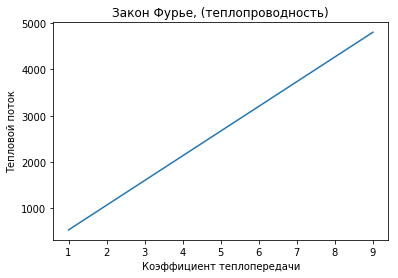

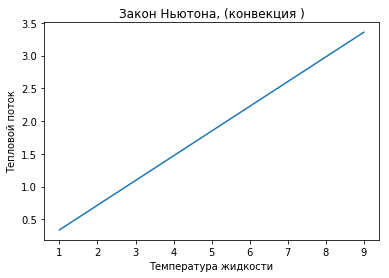

In [15]:
pi = math.pi
g = 9.81
#Fourier's law
def q_conduction(l,k,r0,ri,t0,ti):
    return 2*pi*k*(t0-ti)/np.log(r0/ri)
#Newton's law
def q_convection(ri,l,h,tf,ti):
    '''ri - pipe inside radius (m),
    l - pipe lenth (m)
    h - constant of proportionality called 'convective heat transfer
    coefficient (W/m2/C)'
    tf - fluid temperature (C)
    ti - inner wall temperature (C)
    
    '''
    return 2*pi*ri*l*h*(tf-ti)

x=np.asarray(range(1,10))
y=q_conduction(10,x,0.9,0.8,20,10)
plt.plot(x,y)
plt.title('Закон Фурье, (теплопроводность)')
plt.xlabel('Коэффициент теплопередачи')
plt.ylabel('Тепловой поток')
plt.show()  

x=np.asarray(range(1,10))
y=q_convection(0.06,1,1,x,0.1)
plt.plot(x,y)
plt.title('Закон Ньютона, (конвекция )')
plt.xlabel('Температура жидкости')
plt.ylabel('Тепловой поток')
plt.show()   